<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


In [9]:
from llibreria import Graph
from util import get_subway_graph, draw_subway_graph
import copy

G, lines = get_subway_graph('csv', Graph)

In [29]:
import llibreria
import random

def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
    #Primer creem un arbre buit
    tree = Graph()
    #Creem una llista i diccionaris als quals donarem ús més endevant
    nodes = {}
    visited = []
    pares = {}
    
    #Dins d'aquest arbre afegim un vèrtex que triarem aleatòriament del graf inicial si no l'especifiquen
    if origin is None:
        origin = random.choice(G.nodes())
        attr_dict = G.node[origin]
        tree.add_node(origin, attr_dict)
        
    else:
        attr_dict = G.node[origin]
        tree.add_node(origin, attr_dict)
        
    nodes[origin] = 0
    
    while nodes:
        #Per cada element de la llista d'items(llista de tuples amb klau, valor), agafem la clau amb valor mínim
        origin = min(nodes.items(), key = lambda x:x[1])[0]
        #Borrem el node de la llista d'arestes i l'afegim a visitats
        del nodes[origin]
        visited.append(origin)
        
        #Mirem els veins del nostre node origen
        connected = G.neighbors(origin)
        
        #Mirem els costos per arribar del node origen 
        for x in connected:
            if x not in visited:   
                #Ho afegim també a una llista on hi ha les arestes visitades fins ara
                if x not in nodes or nodes[x] > G.edge[origin][x]['distance']:
                    nodes[x] = G.edge[origin][x]['distance']
                    pares[x] = origin
    
    #Afegim tots els nodes i les arestes a l'arbre
    for x, y in pares.items():
        tree.add_node(x, G.node[x])
        tree.add_node(y, G.node[y])
        tree.add_edge(x,y,G.edge[x][y])
    
    return tree

In [30]:
prim(G)

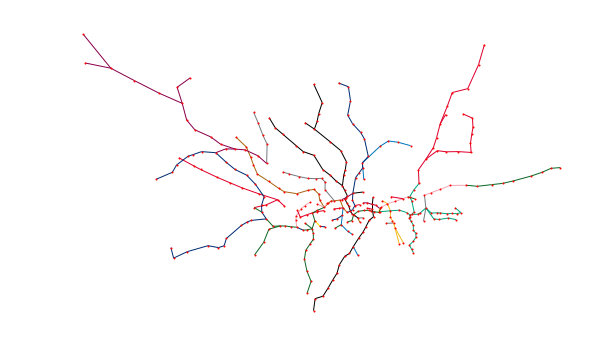

In [31]:
draw_subway_graph(prim(G), lines)

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

### Realització de l'algorisme:
En primer lloc he escollit el node inicial en funcio de si venia donar per paràmetre o no.
Un cop fet això, he realitzat el bucle principal que el que fa és el següent:

- Mentre la llista de nodes no visitats és plena, agafa el que podem arribar-hi amb pes mínim.
- Des d'aquest node, mira els possibles nodes als quals es pot arribar, i escull el de pes mínim, si aquest ja havia estat escollit abans però actualment el pes és inferior, l'actualitza.També guarda en un diccionara el node al que anem i del que venim.
    
Quan surt del bucle principal, afaga el diccionari on tenim guardats els nodes que es relacionen entre si i els afageix al nou graf, que ara serà un arbre, juntament amb l'aresta que els relaciona
   
### Cost computacional de l'algorisme:
Si analitzem el codi realitzat, el cost que ens quedaria seria el següent:
$O((|V|·|N|)·|V|)$
    
On:
- V = nodes
- N = veins

Seria aquest ja que el bucele principal recorre tots els nodes(|V|) i de tots ells en vissita tots els seus veïns (|N|) i a més a més se l'hi ha d'afegir el cost de buscar el mínim en la llista de nodes, que en el pitjor cas seriem tots (|V|).

Com que el concepte veïns és una mica abstracte ja que mai sabem la quantitat exacte de veïns, agafem la relació següent:
    |E| = |V| · |N|
    
Aquesta ens diu que la cardinalitat d'arestes normalment és igual a la cardinalitat de nodes per la cardinalitat de veïns.

Aleshores, partint d'aquí i per tenir una complexitat més tangible quedaria el següent:
    $O((|V|+|E|)·|V|)$
    
    
###### Per tant la complexitat és: $O((|V|+|E|)·|V|)$


<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>